In [20]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/telco-customer-churn


In [21]:
import pandas as pd
import os # Import the os module for path manipulation
import kagglehub # Import kagglehub as it was used previously

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

# List files in the downloaded directory to find the CSV file
files_in_path = os.listdir(path)

# Assuming there is a single CSV file in the directory, find it
csv_file_name = None
for file in files_in_path:
    if file.endswith('.csv'):
        csv_file_name = file
        break

if csv_file_name is None:
    raise FileNotFoundError(f"No CSV file found in the downloaded directory: {path}")

# Construct the full path to the CSV file
csv_file_path = os.path.join(path, csv_file_name)

df = pd.read_csv(csv_file_path)
df.head()

Path to dataset files: /kaggle/input/telco-customer-churn


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **EXPLORATORY DATA ANALYSIS**

# **1. Understand the Structure**

What’s inside the dataset?

In [22]:
df.shape         # Rows and columns


(7043, 21)

In [23]:
df.columns       # Column names


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [24]:
df.dtypes        # Data types

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


# **2. Preview the Data**

See what the data looks like.

In [25]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


<Axes: xlabel='Churn'>

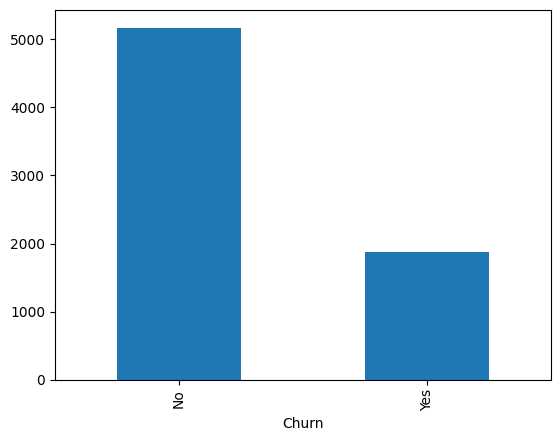

In [26]:
df.Churn.value_counts().plot(kind='bar')
# The target column is imbalanced

# **3. Check for Missing Values**


Any null/NaN values?

In [27]:
df.isnull().sum()
df.isnull().mean()
df = df.drop(['customerID'],axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
df.gender.unique()

array(['Female', 'Male'], dtype=object)

# **4 Check Duplicate Values**

In [29]:
df.duplicated().sum()

np.int64(22)

# **5. Basic Stats Summary**
Numeric column summary

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [31]:
# Ensure TotalCharges is a string before using .str accessor
df['TotalCharges'] = df['TotalCharges'].astype(str)

# Now you can safely use .str.replace()
df.TotalCharges = df.TotalCharges.str.replace(" ''",'')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors="ignore")

/tmp/ipython-input-32-718264848.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df.TotalCharges = pd.to_numeric(df.TotalCharges, errors="ignore")


In [33]:
import numpy as np
import pandas as pd

# Ensure TotalCharges is treated as string before cleaning
df['TotalCharges'] = df['TotalCharges'].astype(str)

# Remove spaces from the string column
df['TotalCharges'] = df['TotalCharges'].str.replace(' ','')

# Replace empty strings with NaN
df['TotalCharges'] = df['TotalCharges'].replace('', np.nan)

# Convert to numeric, coercing errors will turn remaining non-numeric values into NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [34]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# **6. Unique Values**

Categorical or ID-like columns?

In [35]:
df.nunique()                # Unique values per column
#df['PhoneService'].value_counts()  # For specific column


,0
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3


# **7. Outlier Detection**

Extreme values in numeric columns

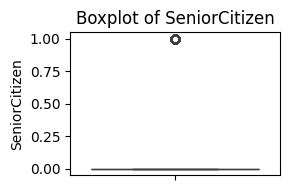

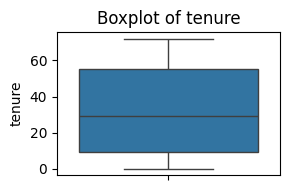

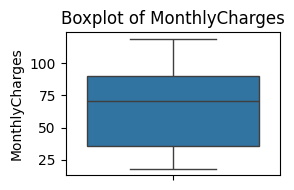

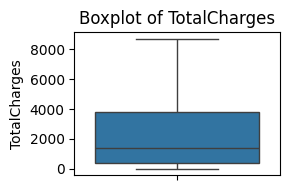

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Plot each numeric column in a boxplot
for col in numeric_cols:
    plt.figure(figsize=(3, 2))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()



# **8. Encoding Categorical Variables**

Make non-numeric data usable

In [37]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Clean TotalCharges: convert to float, fill NaN with median
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Label Encoding for binary columns
le = LabelEncoder()
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService',
               'PaperlessBilling', 'Churn']

for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# One-Hot Encoding for multi-class categorical columns
multi_class_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)

# Optional: Show final shape and preview
print("Data shape after encoding:", df.shape)
df.head()


Data shape after encoding: (7043, 31)


/tmp/ipython-input-37-476449338.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,False,False,True,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,False,False,False,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,True,False,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,True,False


# **9. Correlation Analysis**

How features relate to each other (for numeric)

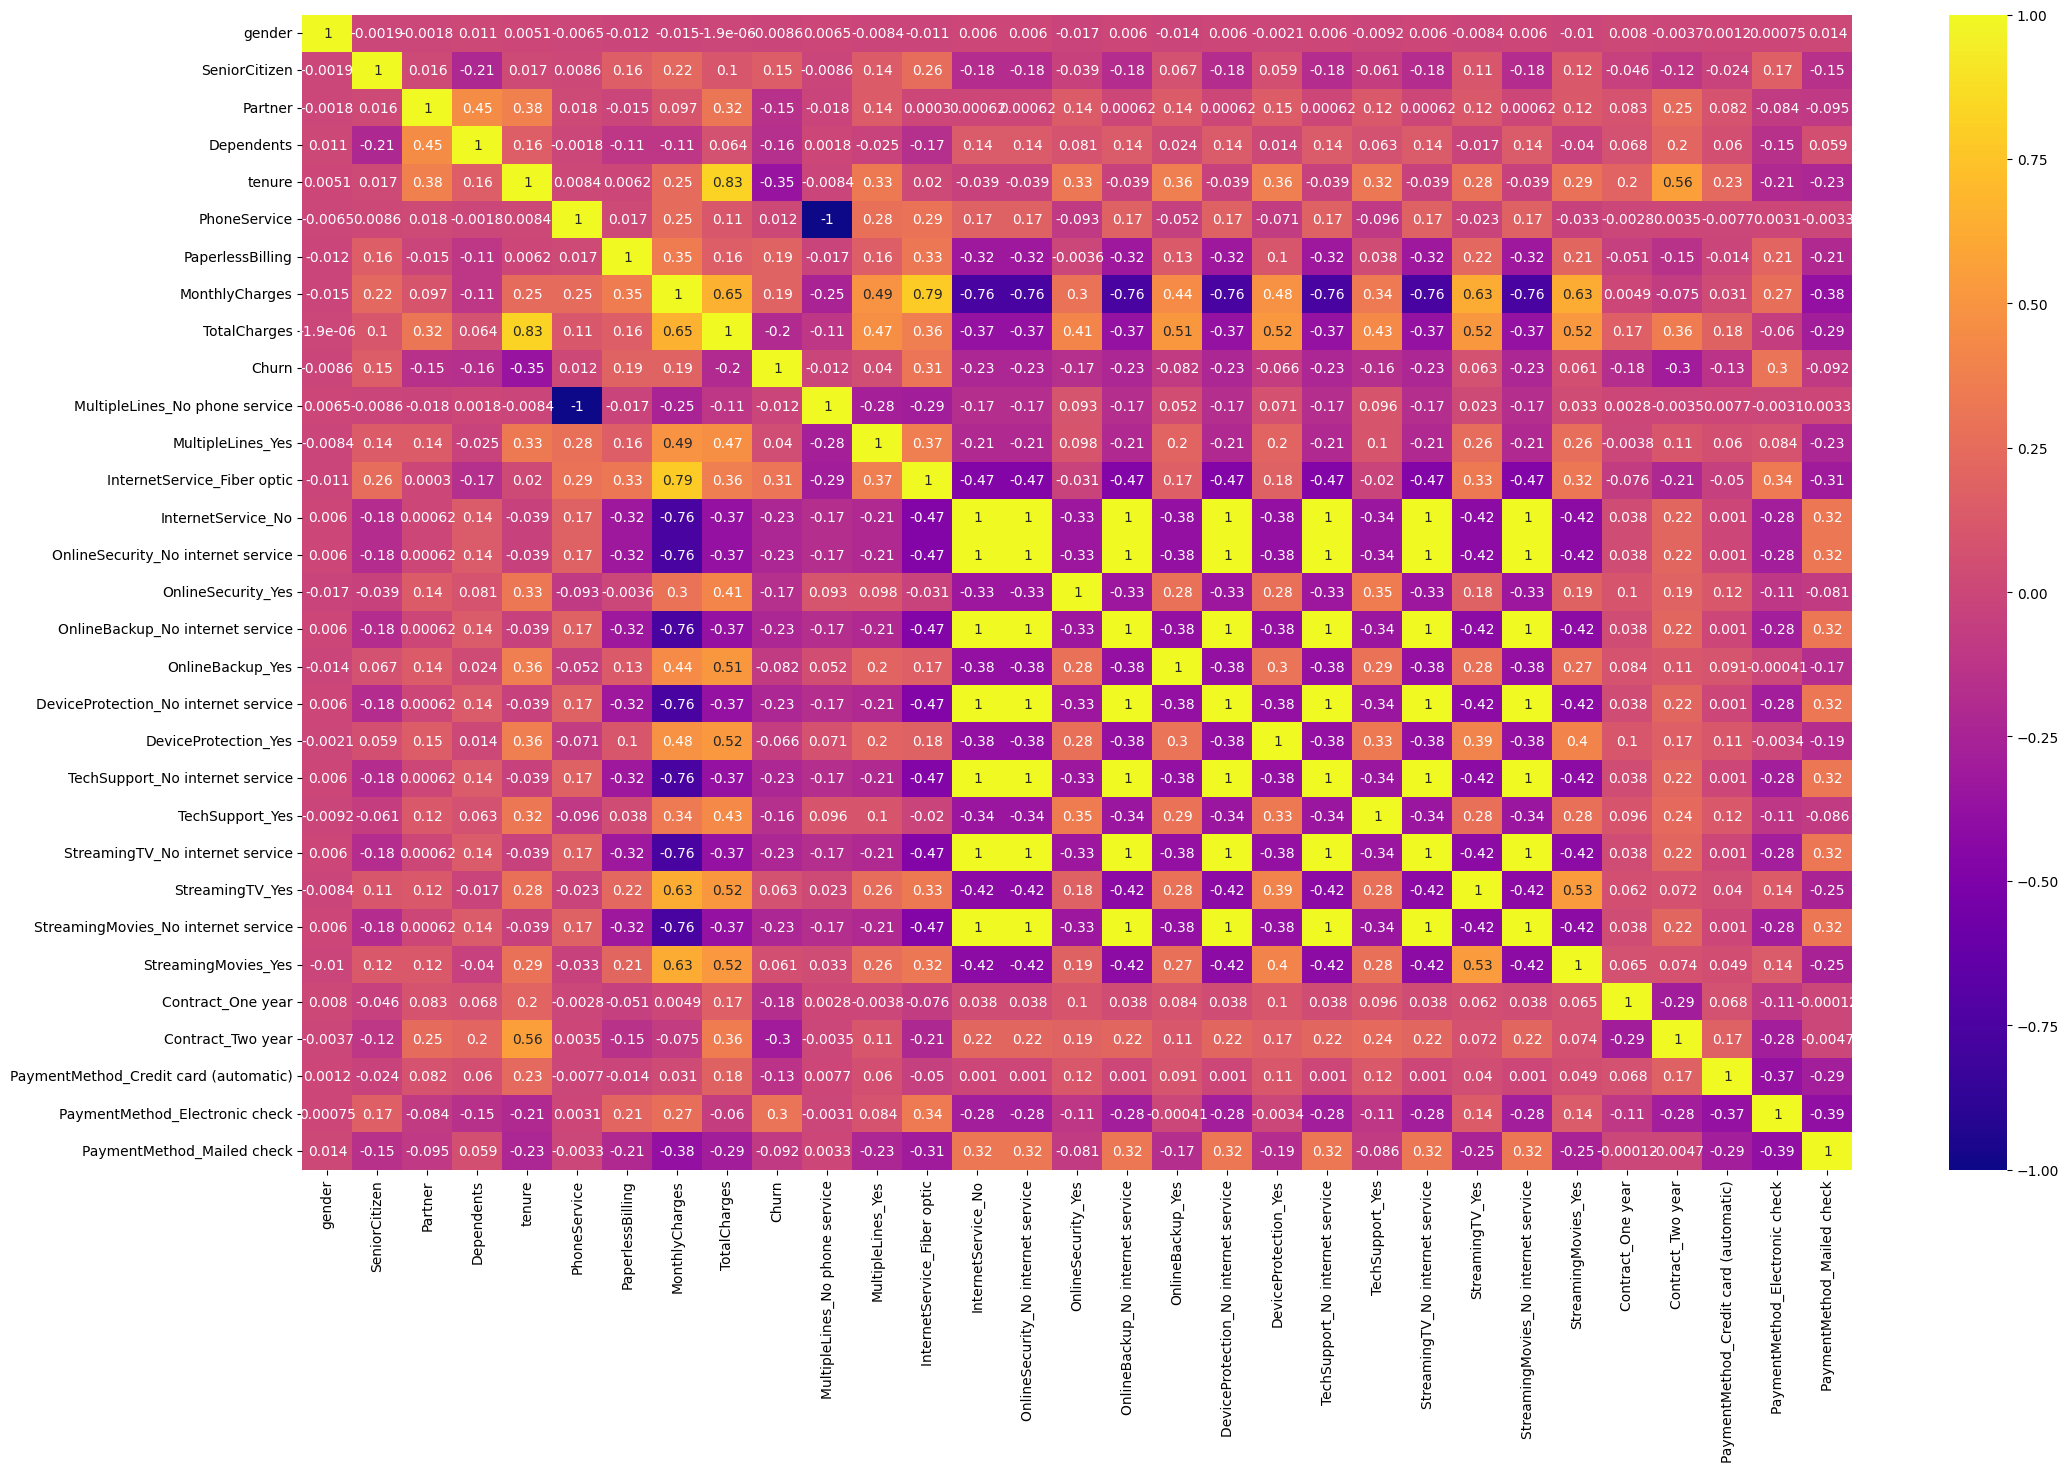

In [38]:
corr = df.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr,annot=True,cbar=True,cmap='plasma')
plt.show()

# **10. Visual Exploration**
See distributions and relationships

<Figure size 1500x1600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


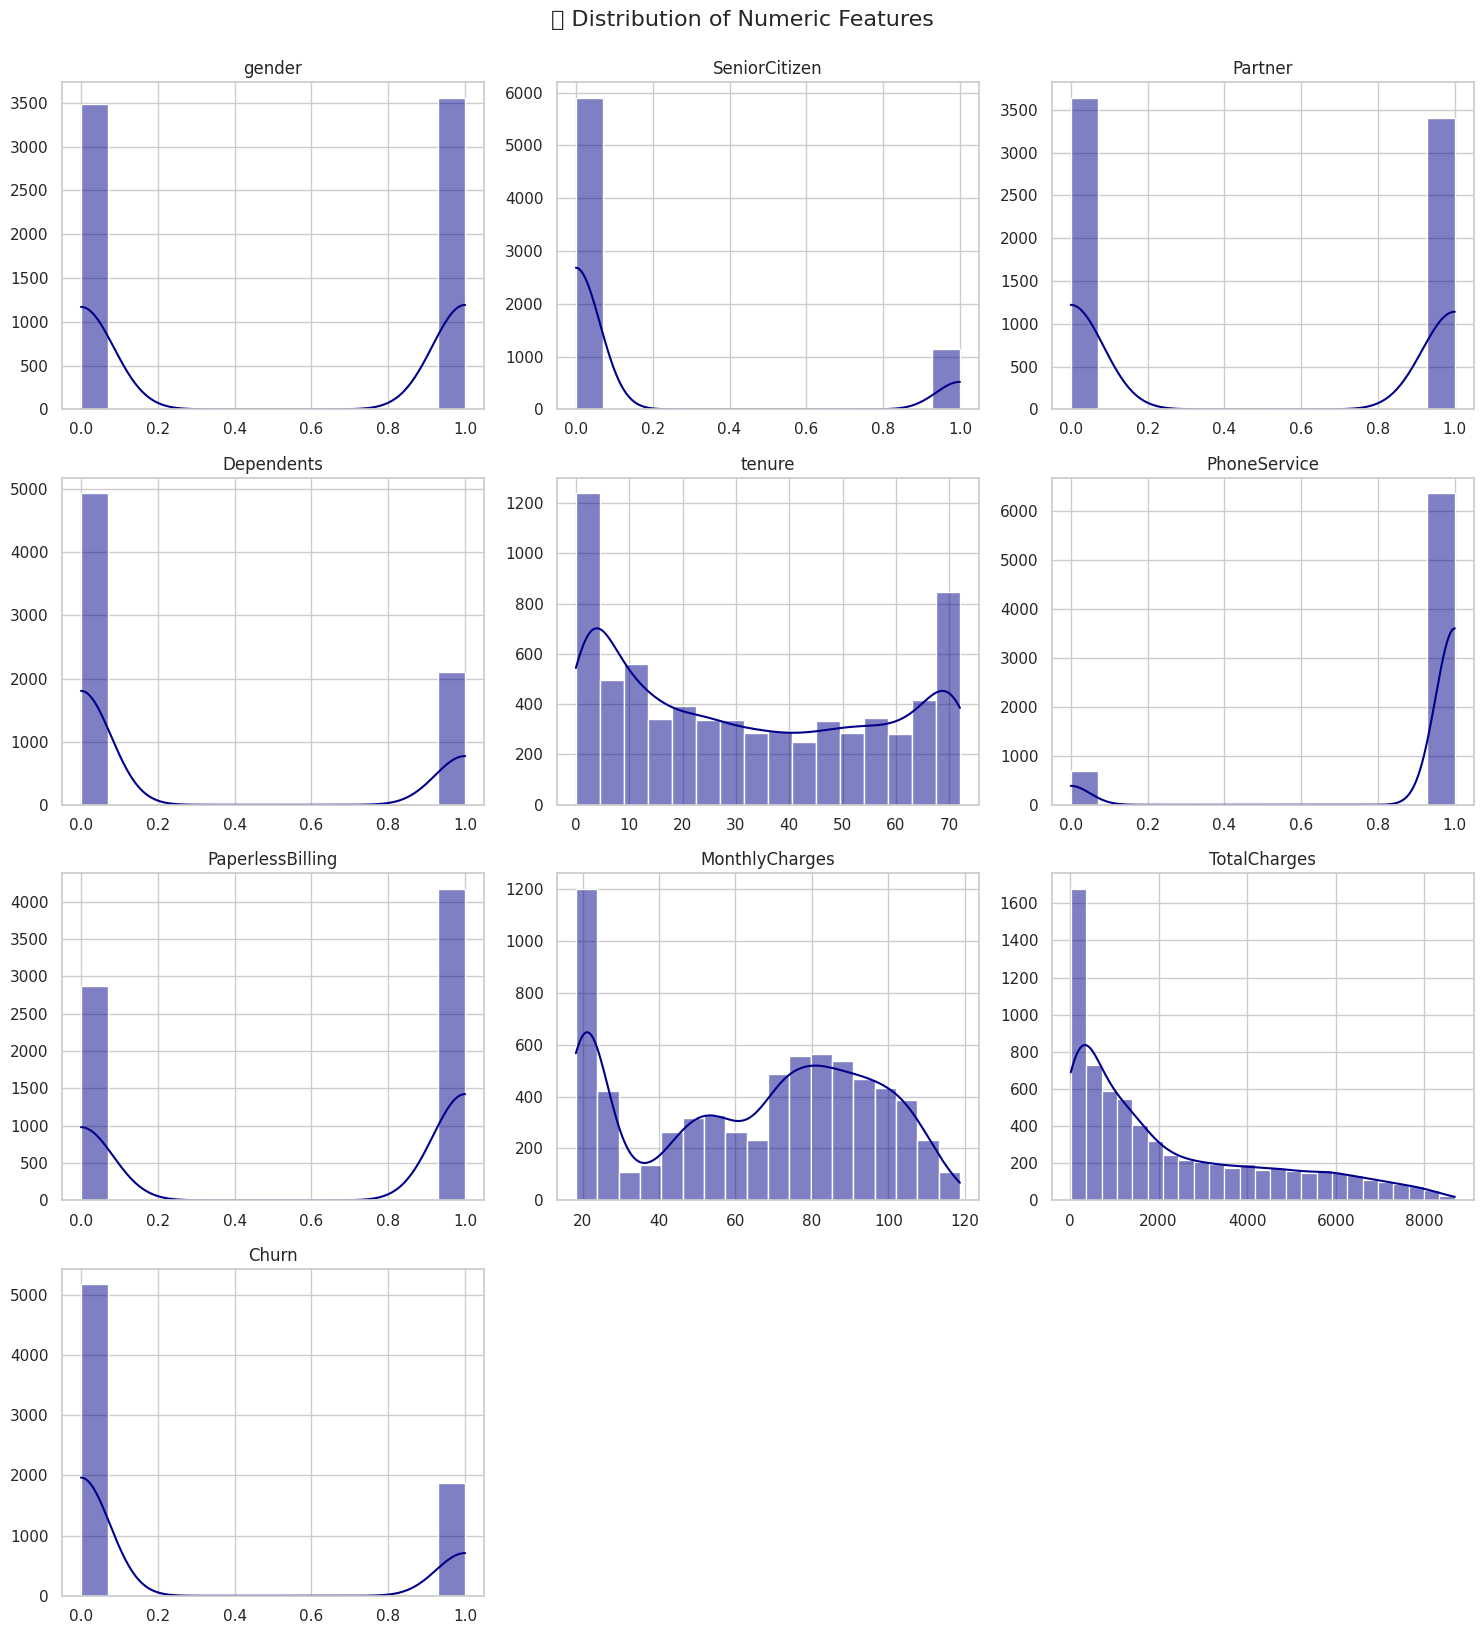

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure DataFrame exists
# df = pd.read_csv("your_dataset.csv")  # Uncomment if needed

# Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns.tolist()

# Layout settings
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(n_cols * 5, n_rows * 4))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

# Plot histograms with KDE
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='darkblue')
    axes[i].set_title(f'{col}', fontsize=12)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("📊 Distribution of Numeric Features", fontsize=16, y=1.02)
plt.show()


# **APPLY MODEL **

In [40]:
# Splitting the dataset
x = df.drop(['Churn'],axis=1)
y = df.Churn

#Apply the train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Handle missing values in 'TotalCharges' in the training data
# Impute with the mean of the training data
import numpy as np # Make sure numpy is imported
mean_total_charges = x_train['TotalCharges'].mean()
x_train['TotalCharges'] = x_train['TotalCharges'].fillna(mean_total_charges)

# Handle missing values in 'TotalCharges' in the testing data using the mean from training data
x_test['TotalCharges'] = x_test['TotalCharges'].fillna(mean_total_charges)


#FEATURE SCALING
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

# Install catboost if not already installed
!pip install catboost

#model selections
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

#objects
lr = LogisticRegression()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()
svc = SVC()
knn = KNeighborsClassifier()
nb = GaussianNB()
lgb = LGBMClassifier()
cat = CatBoostClassifier()

#Fittings
lr.fit(x_train_scaled,y_train)
rf.fit(x_train_scaled,y_train)

# Note: You had a separate cell with model.fit(X_train, y_train) after this one.
# This cell is redundant and refers to variables X_train, y_train which are not defined.
# You should remove that cell.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00


RandomForestClassifier()

In [41]:
gb.fit(x_train_scaled,y_train)
xgb.fit(x_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [42]:
svc.fit(x_train_scaled,y_train)
knn.fit(x_train_scaled,y_train)

KNeighborsClassifier()

In [43]:
nb.fit(x_train_scaled,y_train)
lgb.set_params(verbosity=-1)
lgb.fit(x_train_scaled,y_train)
cat.fit(x_train_scaled,y_train, verbose=False)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [44]:
#preds
lrpred = lr.predict(x_test_scaled)
rfpred = rf.predict(x_test_scaled)
gbpred = gb.predict(x_test_scaled)
xgbpred = xgb.predict(x_test_scaled)
svcpred = svc.predict(x_test_scaled)
knnpred = knn.predict(x_test_scaled)
nbpred = nb.predict(x_test_scaled)
lgbpred = lgb.predict(x_test_scaled)
catpred = cat.predict(x_test_scaled)

#Evaluations
from sklearn.metrics import accuracy_score
lracc = accuracy_score(y_test,lrpred)
rfacc = accuracy_score(y_test,rfpred)
gbacc = accuracy_score(y_test,gbpred)
xgbacc = accuracy_score(y_test,xgbpred)
svcacc = accuracy_score(y_test,svcpred)
knnacc = accuracy_score(y_test,knnpred)
nbacc = accuracy_score(y_test,nbpred)
lgbacc = accuracy_score(y_test,lgbpred)
catacc = accuracy_score(y_test,catpred)

print('LOGISTIC REG',lracc)
print('RANDOM FOREST',rfacc)
print('GB',gbacc)
print('XGB',xgbacc)
print('SVC',svcacc)
print('KNN',knnacc)
print('NB',nbacc)
print('LIGHT GBM',lgbacc)
print('CATO',catacc)


LOGISTIC REG 0.8197303051809794
RANDOM FOREST 0.7892122072391767
GB 0.8090844570617459
XGB 0.7984386089425124
SVC 0.8140525195173882
KNN 0.7700496806245565
NB 0.6657203690560681
LIGHT GBM 0.8048261178140526
CATO 0.8041163946061036


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


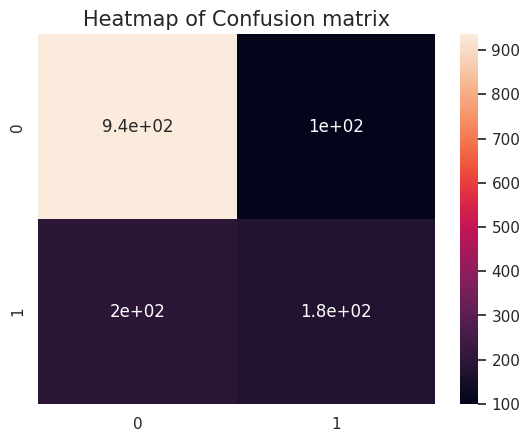

In [45]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,rfpred) #Enter the model pred here
plt.title('Heatmap of Confusion matrix',fontsize=15)
sns.heatmap(cm,annot=True)
plt.show()

In [46]:
#NOW we will check the classification report
print(classification_report(y_test,rfpred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1036
           1       0.64      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409



# **RESULTS BEFORE AND AFTER BALANCING THE DATA**

In [47]:
# Install imbalanced-learn if not already installed
!pip install imbalanced-learn

# Splitting the dataset
x = df.drop(['Churn'],axis=1)
y = df.Churn

#Apply the train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42, stratify=y) # Added stratify to maintain class distribution

# Handle missing values in 'TotalCharges' in the training data
# Impute with the mean of the training data
import numpy as np # Make sure numpy is imported
mean_total_charges = x_train['TotalCharges'].mean()
x_train['TotalCharges'] = x_train['TotalCharges'].fillna(mean_total_charges)

# Handle missing values in 'TotalCharges' in the testing data using the mean from training data
x_test['TotalCharges'] = x_test['TotalCharges'].fillna(mean_total_charges)


#FEATURE SCALING
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.transform(x_test)

# ------------------------------------------------------------
# Train models on ORIGINAL (imputed and scaled) data
# ------------------------------------------------------------

#model selections
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

#objects - Create new instances to avoid retraining
lr_orig = LogisticRegression()
rf_orig = RandomForestClassifier(random_state=42)
gb_orig = GradientBoostingClassifier(random_state=42)
xgb_orig = XGBClassifier(random_state=42)
svc_orig = SVC(random_state=42)
knn_orig = KNeighborsClassifier() # KNN doesn't have random_state
nb_orig = GaussianNB() # GaussianNB doesn't have random_state
lgb_orig = LGBMClassifier(random_state=42)
cat_orig = CatBoostClassifier(random_state=42, verbose=False)


print("Training models on ORIGINAL data...")
#Fittings
lr_orig.fit(x_train_scaled,y_train)
rf_orig.fit(x_train_scaled,y_train)
gb_orig.fit(x_train_scaled,y_train)
xgb_orig.fit(x_train_scaled,y_train)
svc_orig.fit(x_train_scaled,y_train)
knn_orig.fit(x_train_scaled,y_train)
nb_orig.fit(x_train_scaled,y_train)
lgb_orig.set_params(verbosity=-1)
lgb_orig.fit(x_train_scaled,y_train)
cat_orig.fit(x_train_scaled,y_train)


#preds
lrpred_orig = lr_orig.predict(x_test_scaled)
rfpred_orig = rf_orig.predict(x_test_scaled)
gbpred_orig = gb_orig.predict(x_test_scaled)
xgbpred_orig = xgb_orig.predict(x_test_scaled)
svcpred_orig = svc_orig.predict(x_test_scaled)
knnpred_orig = knn_orig.predict(x_test_scaled)
nbpred_orig = nb_orig.predict(x_test_scaled)
lgbpred_orig = lgb_orig.predict(x_test_scaled)
catpred_orig = cat_orig.predict(x_test_scaled)

#Evaluations - Original
from sklearn.metrics import accuracy_score
lracc_orig = accuracy_score(y_test,lrpred_orig)
rfacc_orig = accuracy_score(y_test,rfpred_orig)
gbacc_orig = accuracy_score(y_test,gbpred_orig)
xgbacc_orig = accuracy_score(y_test,xgbpred_orig)
svcacc_orig = accuracy_score(y_test,svcpred_orig)
knnacc_orig = accuracy_score(y_test,knnpred_orig)
nbacc_orig = accuracy_score(y_test,nbpred_orig)
lgbacc_orig = accuracy_score(y_test,lgbpred_orig)
catacc_orig = accuracy_score(y_test,catpred_orig)

print('\n--- Results BEFORE Balancing ---')
print('LOGISTIC REG:',lracc_orig)
print('RANDOM FOREST:',rfacc_orig)
print('GB:',gbacc_orig)
print('XGB:',xgbacc_orig)
print('SVC:',svcacc_orig)
print('KNN:',knnacc_orig)
print('NB:',nbacc_orig)
print('LIGHT GBM:',lgbacc_orig)
print('CATBOOST:',catacc_orig)


# ------------------------------------------------------------
# Apply Balancing (SMOTE) and Train models AFTER Balancing
# ------------------------------------------------------------
from imblearn.over_sampling import SMOTE

print("\nApplying SMOTE to training data...")
smote = SMOTE(random_state=42)
x_train_scaled_balanced, y_train_balanced = smote.fit_resample(x_train_scaled, y_train)

print(f"Original training shape: {x_train_scaled.shape}, Original target distribution:\n{np.bincount(y_train)}")
print(f"Balanced training shape: {x_train_scaled_balanced.shape}, Balanced target distribution:\n{np.bincount(y_train_balanced)}")


#objects - Create new instances for balanced data
lr_bal = LogisticRegression()
rf_bal = RandomForestClassifier(random_state=42)
gb_bal = GradientBoostingClassifier(random_state=42)
xgb_bal = XGBClassifier(random_state=42)
svc_bal = SVC(random_state=42)
knn_bal = KNeighborsClassifier() # KNN doesn't have random_state
nb_bal = GaussianNB() # GaussianNB doesn't have random_state
lgb_bal = LGBMClassifier(random_state=42)
cat_bal = CatBoostClassifier(random_state=42, verbose=False)

print("\nTraining models on BALANCED data...")
#Fittings - Balanced
lr_bal.fit(x_train_scaled_balanced, y_train_balanced)
rf_bal.fit(x_train_scaled_balanced, y_train_balanced)
gb_bal.fit(x_train_scaled_balanced, y_train_balanced)
xgb_bal.fit(x_train_scaled_balanced, y_train_balanced)
svc_bal.fit(x_train_scaled_balanced, y_train_balanced)
knn_bal.fit(x_train_scaled_balanced, y_train_balanced)
nb_bal.fit(x_train_scaled_balanced, y_train_balanced)
lgb_bal.set_params(verbosity=-1)
lgb_bal.fit(x_train_scaled_balanced, y_train_balanced)
cat_bal.fit(x_train_scaled_balanced, y_train_balanced)

#preds - Balanced (Evaluate on original x_test_scaled)
lrpred_bal = lr_bal.predict(x_test_scaled)
rfpred_bal = rf_bal.predict(x_test_scaled)
gbpred_bal = gb_bal.predict(x_test_scaled)
xgbpred_bal = xgb_bal.predict(x_test_scaled)
svcpred_bal = svc_bal.predict(x_test_scaled)
knnpred_bal = knn_bal.predict(x_test_scaled)
nbpred_bal = nb_bal.predict(x_test_scaled)
lgbpred_bal = lgb_bal.predict(x_test_scaled)
catpred_bal = cat_bal.predict(x_test_scaled)


#Evaluations - Balanced
lracc_bal = accuracy_score(y_test,lrpred_bal)
rfacc_bal = accuracy_score(y_test,rfpred_bal)
gbacc_bal = accuracy_score(y_test,gbpred_bal)
xgbacc_bal = accuracy_score(y_test,xgbpred_bal)
svcacc_bal = accuracy_score(y_test,svcpred_bal)
knnacc_bal = accuracy_score(y_test,knnpred_bal)
nbacc_bal = accuracy_score(y_test,nbpred_bal)
lgbacc_bal = accuracy_score(y_test,lgbpred_bal)
catacc_bal = accuracy_score(y_test,catpred_bal)

print('\n--- Results AFTER Balancing (SMOTE) ---')
print('LOGISTIC REG:',lracc_bal)
print('RANDOM FOREST:',rfacc_bal)
print('GB:',gbacc_bal)
print('XGB:',xgbacc_bal)
print('SVC:',svcacc_bal)
print('KNN:',knnacc_bal)
print('NB:',nbacc_bal)
print('LIGHT GBM:',lgbacc_bal)
print('CATBOOST:',catacc_bal)

# Example of showing confusion matrix for one model before and after balancing
from sklearn.metrics import confusion_matrix, classification_report

print("\n--- Logistic Regression Confusion Matrix (Before Balancing) ---")
print(confusion_matrix(y_test, lrpred_orig))
print(classification_report(y_test, lrpred_orig)) # Classification report provides precision, recall, f1-score

print("\n--- Logistic Regression Confusion Matrix (After Balancing - SMOTE) ---")
print(confusion_matrix(y_test, lrpred_bal))
print(classification_report(y_test, lrpred_bal)) # Compare with classification report above

Training models on ORIGINAL data...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



--- Results BEFORE Balancing ---
LOGISTIC REG: 0.8069552874378992
RANDOM FOREST: 0.78708303761533
GB: 0.7984386089425124
XGB: 0.7821149751596878
SVC: 0.7927608232789212
KNN: 0.7473385379701917
NB: 0.6557842441447835
LIGHT GBM: 0.794889992902768
CATBOOST: 0.801277501774308

Applying SMOTE to training data...
Original training shape: (5634, 30), Original target distribution:
[4139 1495]
Balanced training shape: (8278, 30), Balanced target distribution:
[4139 4139]

Training models on BALANCED data...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



--- Results AFTER Balancing (SMOTE) ---
LOGISTIC REG: 0.7381121362668559
RANDOM FOREST: 0.7771469127040455
GB: 0.7778566359119943
XGB: 0.7672107877927609
SVC: 0.7572746628814763
KNN: 0.6891412349183819
NB: 0.6600425833924769
LIGHT GBM: 0.7743080198722498
CATBOOST: 0.7814052519517388

--- Logistic Regression Confusion Matrix (Before Balancing) ---
[[925 110]
 [162 212]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409


--- Logistic Regression Confusion Matrix (After Balancing - SMOTE) ---
[[742 293]
 [ 76 298]]
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1035
           1       0.50      0.80      0.62       374

    accuracy                           0.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


# **CROSS VAL SCORE**

In [48]:

from sklearn.model_selection import cross_val_score

# Perform cross-validation on the Logistic Regression model
cross_val = cross_val_score(estimator=lr, X=x_train_scaled, y=y_train)
print('Cross Val Acc Score of LOGISTIC REGRESSION model is ---> ',cross_val)
print('\n Cross Val Mean Acc Score of LOGISTIC REGRESSION model is ---> ',cross_val.mean())


Cross Val Acc Score of LOGISTIC REGRESSION model is --->  [0.82786158 0.80035492 0.80745342 0.79414374 0.79129663]

 Cross Val Mean Acc Score of LOGISTIC REGRESSION model is --->  0.8042220579636595


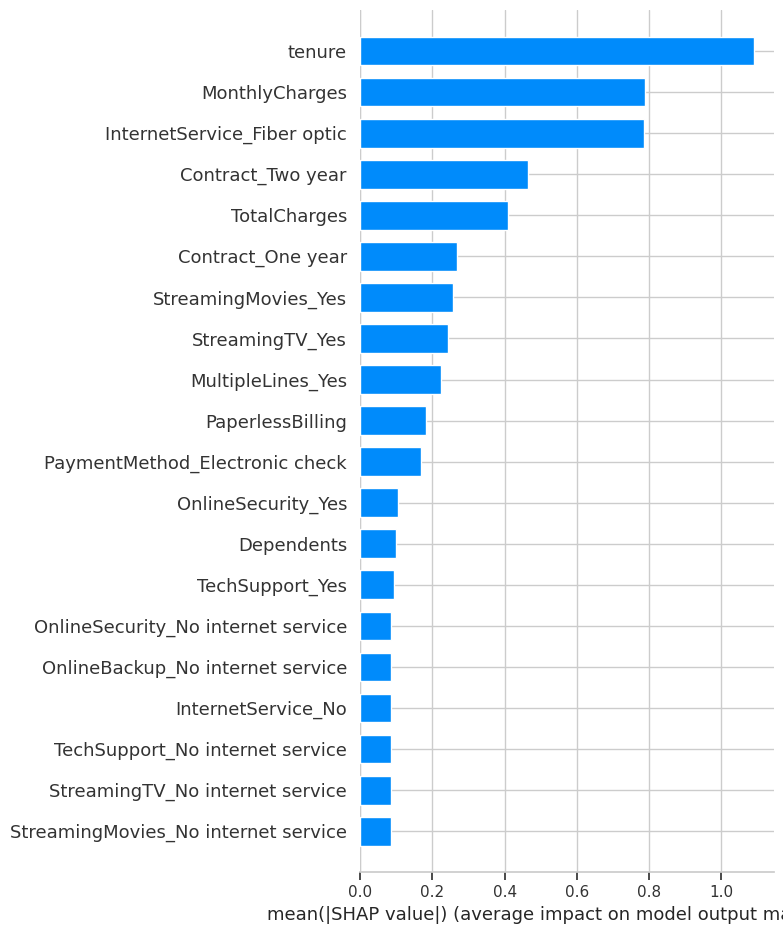

In [49]:
import shap

# Train your logistic regression model
best_model = lr.fit(x_train_scaled, y_train)

# Create SHAP explainer for linear models
explainer = shap.Explainer(best_model, x_train_scaled)

# Get SHAP values for test set
shap_values = explainer(x_test_scaled)

# Summary plot (bar plot)
shap.summary_plot(shap_values, x_test_scaled, feature_names=x.columns, plot_type="bar")


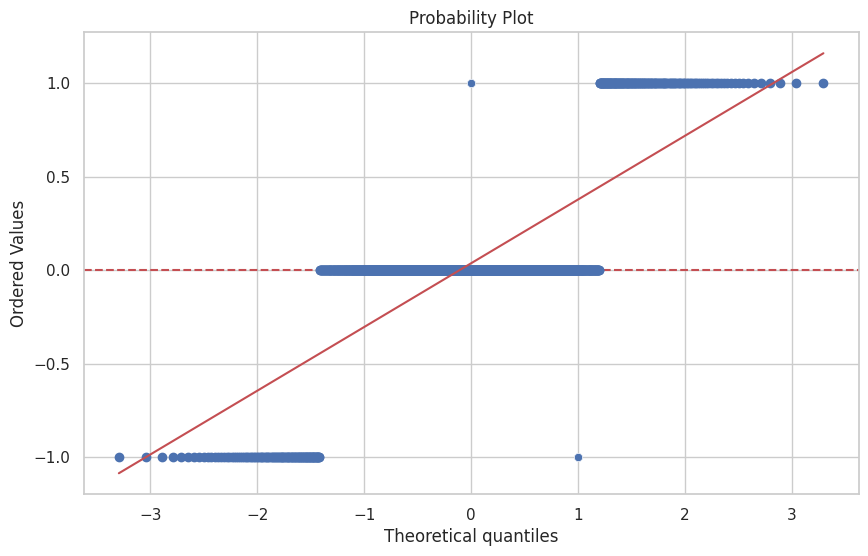

In [50]:
residuals = y_test - best_model.predict(x_test_scaled)

# Residual vs Predicted plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=best_model.predict(x_test_scaled), y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")

# Q-Q plot for normality check
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt);

In [51]:
from sklearn.metrics import mean_squared_error

# Convert RMSE to dollar terms (assuming prices are in $1,000s)
rmse_dollars = np.sqrt(mean_squared_error(y_test, best_model.predict(x_test_scaled))) * 1000
print(f"Average Prediction Error: ${rmse_dollars:,.2f}")

# Compare to median house price
median_price = np.median(y_train) * 1000
print(f"Error as % of Median Price: {rmse_dollars/median_price:.2%}")

Average Prediction Error: $439.37
Error as % of Median Price: inf%


/tmp/ipython-input-51-1023130663.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  print(f"Error as % of Median Price: {rmse_dollars/median_price:.2%}")


Text(0.5, 1.0, 'Cross-Validated Predictions')

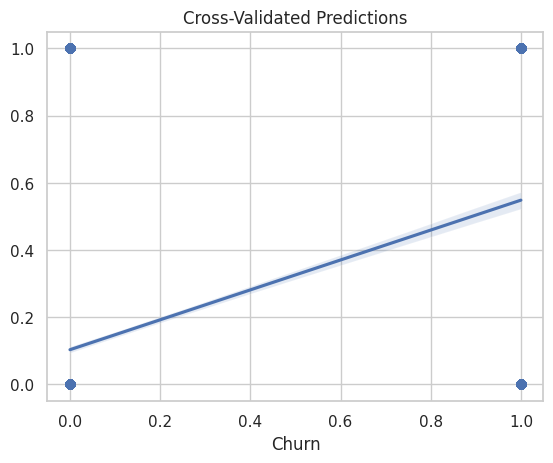

In [52]:
from sklearn.model_selection import cross_val_predict

# Get cross-val predictions with uncertainty
predictions = cross_val_predict(best_model, x_train_scaled, y_train, cv=5, method="predict")

# Plot actual vs predicted with 95% CI
sns.regplot(x=y_train, y=predictions)
plt.title("Cross-Validated Predictions")

In [53]:
import pickle
from sklearn.metrics import confusion_matrix, accuracy_score

# Saving the Logistic Regression model
pickle.dump(lr, open('Customer_Churn_LogReg.pickle', 'wb'))

# Loading the model
Customer_Churn_LogReg_model = pickle.load(open('Customer_Churn_LogReg.pickle', 'rb'))

# Predicting the output
y_pred = Customer_Churn_LogReg_model.predict(x_test_scaled)

# Confusion matrix
print('Confusion Matrix of Customer_Churn_LogReg:\n', confusion_matrix(y_test, y_pred), '\n')

# Accuracy score
print('Accuracy Score on test data by Logistic Regression model --->', accuracy_score(y_test, y_pred))


Confusion Matrix of Customer_Churn_LogReg:
 [[925 110]
 [162 212]] 

Accuracy Score on test data by Logistic Regression model ---> 0.8069552874378992
